# Using python for deep learning

### Using an ANN model for deep learniing

Importing libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Using the dataset

In [24]:
dataset_path = "labelled_dataset.csv"
features = 20
group_rows = 5

Methid for creating a balanced dataset

In [25]:
def create_dataset(dataset_path):
    df = pd.read_csv(dataset_path)
    df = df.dropna()

    # Normalize
    scaler = MinMaxScaler()
    df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

    # Balance the dataset
    class_0 = df[df.iloc[:, -1] == 0]
    class_1 = df[df.iloc[:, -1] == 1]
    if len(class_0) > len(class_1):
        class_1 = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
    else:
        class_0 = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)

    df_balanced = pd.concat([class_0, class_1]).sample(frac=1).reset_index(drop=True)
    return df_balanced

Method for processing and grouping the data

In [26]:
def process_data(dataset_path, group_rows=5):
    df = create_dataset(dataset_path)
    grouped = df.groupby(df.iloc[:, -1])
    all_features, all_labels = [], []

    for label in [0, 1]:
        data = grouped.get_group(label)
        usable_len = len(data) - (len(data) % group_rows)
        data = data.iloc[:usable_len, :]

        X = data.iloc[:, :-1].values.reshape(-1, group_rows * features)  # Flattened for ANN
        y = np.full((X.shape[0],), label)

        all_features.append(X)
        all_labels.append(y)

    X = np.concatenate(all_features)
    y = np.concatenate(all_labels)
    y_cat = to_categorical(y, 2)
    return X, y_cat


Method for creating an Aritifical Neural Network (ANN) model

In [27]:
def model_init(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),

        Dense(32, activation='relu'),
        # Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

Using the ANN model

Epoch 1/50


c:\Users\Kids-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5964 - loss: 0.6777 - val_accuracy: 0.7463 - val_loss: 0.6537
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8163 - loss: 0.6370 - val_accuracy: 0.8507 - val_loss: 0.6317
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8404 - loss: 0.6167 - val_accuracy: 0.8507 - val_loss: 0.6109
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7892 - loss: 0.5935 - val_accuracy: 0.8657 - val_loss: 0.5920
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9096 - loss: 0.5566 - val_accuracy: 0.8657 - val_loss: 0.5678
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8765 - loss: 0.5236 - val_accuracy: 0.7761 - val_loss: 0.5506
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8765 - loss: 0.4828 - val_accuracy: 0.7761 - val_loss: 0.5199
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9036 - loss: 0.4486 - val_accuracy: 0.8955 - val_loss: 0.4

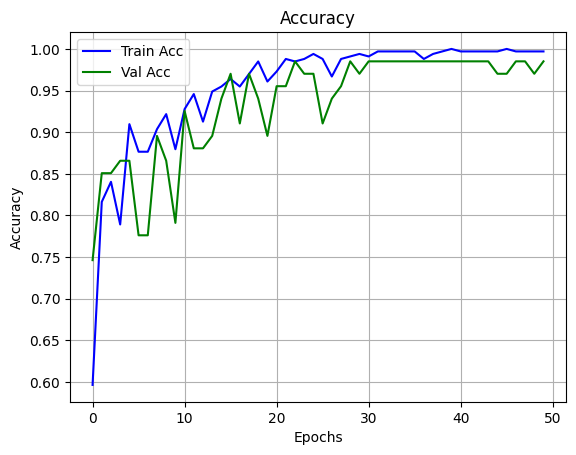

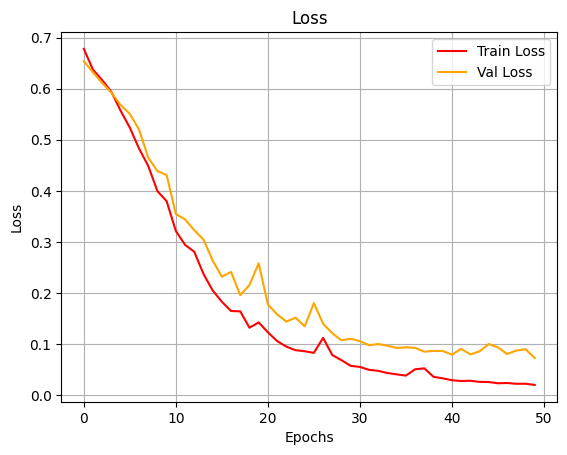

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


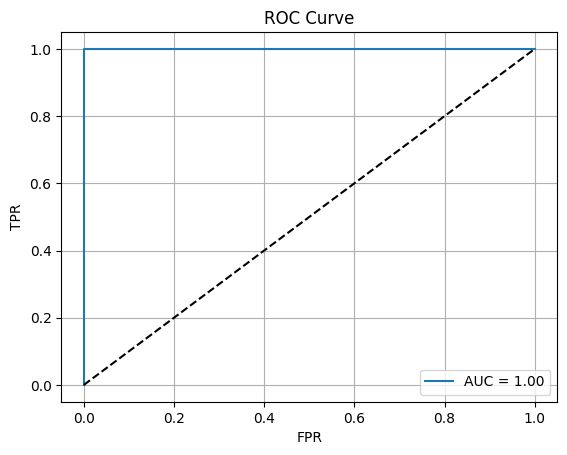

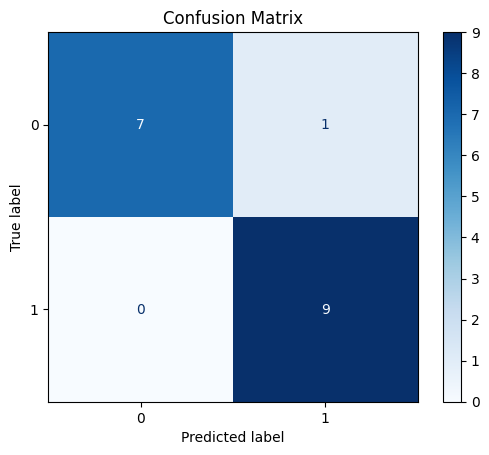

Accuracy: 0.94
F1 Score: 0.94
Precision: 0.95
Recall: 0.94
AUC: 1.00


In [28]:
# Load and split data
X, y = process_data(dataset_path, group_rows)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

# Train ANN model
model = model_init(input_dim=X.shape[1])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32, verbose=1)

# Evaluate and Visualize
# Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test[:, 1], y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Final Metrics
print(f"Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]:.2f}")
print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.2f}")
print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
print(f"AUC: {roc_auc:.2f}")

### Using an LSTM model for deep learning

Importing libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Using the dataset

In [43]:
dataset_path = "labelled_dataset.csv"
features = 20
group_rows = 5

Method for creating a balanced dataset

In [44]:
def create_dataset(dataset_path):
    df = pd.read_csv(dataset_path)
    df = df.dropna()

    # Normalize features
    scaler = MinMaxScaler()
    df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

    # Balance the classes
    class_0 = df[df.iloc[:, -1] == 0]
    class_1 = df[df.iloc[:, -1] == 1]

    if len(class_0) > len(class_1):
        class_1 = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
    elif len(class_1) > len(class_0):
        class_0 = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)

    df_balanced = pd.concat([class_0, class_1]).sample(frac=1).reset_index(drop=True)
    return df_balanced

Method for processing and segmenting the data

In [45]:
def process_data(dataset_path, group_rows=group_rows):
    df = create_dataset(dataset_path)
    grouped = df.groupby(df.iloc[:, -1])
    all_features, all_labels = [], []

    for label in [0, 1]:
        data = grouped.get_group(label)
        usable_len = len(data) - (len(data) % group_rows)
        data = data.iloc[:usable_len, :]

        X = data.iloc[:, :-1].values.reshape(-1, group_rows, features)
        y = np.full((X.shape[0],), label)

        all_features.append(X)
        all_labels.append(y)

    X = np.concatenate(all_features)
    y = np.concatenate(all_labels)
    y_cat = to_categorical(y, 2)
    return X, y_cat

Method for creating an LSTM model

In [46]:
def model_init():
    model = Sequential([
        BatchNormalization(),
        LSTM(units=64, input_shape=(group_rows, features)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(2, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

Using the LSTM model

Epoch 1/50


c:\Users\Kids-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7010 - loss: 0.6595 - val_accuracy: 0.5484 - val_loss: 0.6695
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9759 - loss: 0.5115 - val_accuracy: 0.5323 - val_loss: 0.6441
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9931 - loss: 0.3292 - val_accuracy: 0.5323 - val_loss: 0.6432
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9931 - loss: 0.1620 - val_accuracy: 0.5806 - val_loss: 0.6447
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9897 - loss: 0.0725 - val_accuracy: 0.5968 - val_loss: 0.6469
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9966 - loss: 0.0359 - val_accuracy: 0.5968 - val_loss: 0.7331
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9931 - loss: 0.0280 - val_accuracy: 0.5806 - val_loss: 0.9568
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9966 - loss: 0.0111 - val_accuracy: 0.5161 - val_loss: 1.

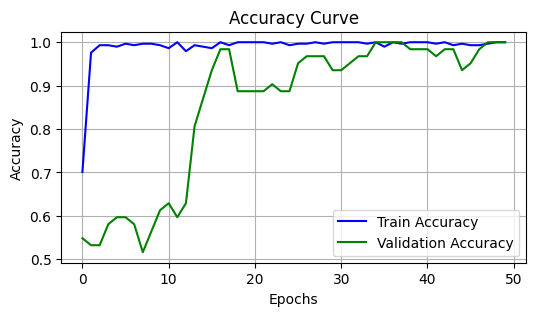

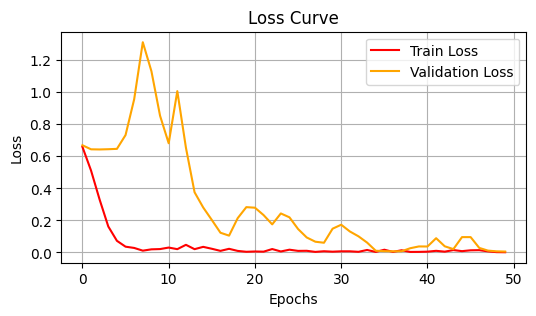

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


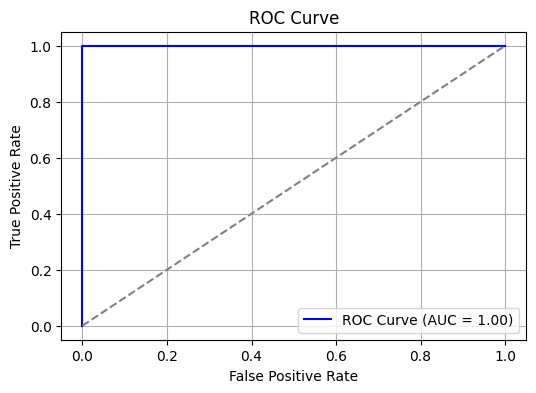

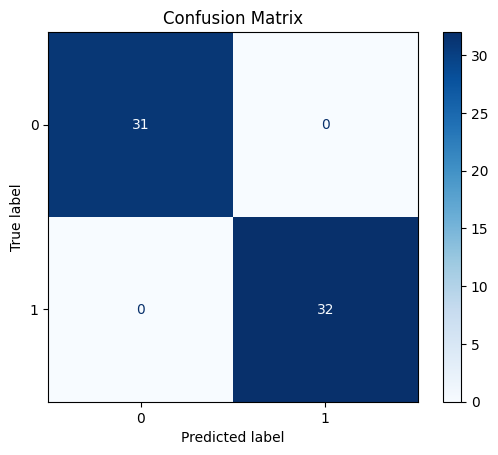


Final Evaluation Metrics:
Accuracy: 1.00
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
AUC: 1.00


In [47]:
# Load data and split
X, y = process_data(dataset_path, group_rows)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Train the model
model = model_init()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32, verbose=1)

# Evaluation & Visualization
# Accuracy and loss plots
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test[:, 1], y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Metrics
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"\nFinal Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC: {roc_auc:.2f}")